<font color=#BD2505><h1 style=text-align:center>COMP41680- Data Science in Python</h1>

<font color=Maroon><h2 style=text-align:center> Assignment 1 </h2>

<font color=#340B87><h2 style=text-align:center>Student ID: 17200461</h2></font>

## Import Packages 

In [1]:
#We need to import all the packages that are required to run the python code
import urllib
from urllib.request import urlopen
import json
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np

#Sometimes Python throws some warnings if there is any compatibility or options issue. We can suppress these warnings.
pd.options.mode.chained_assignment = None  # default='warn'


# Task 1: Identify one or more suitable web APIs
</br>
<font color='Red'><b>API Chosen:</font>

* I have chosen a single API which is provided by https://www.meetup.com/ .

* Specifically, finding the meetup groups https://secure.meetup.com/meetup_api/console/?path=/find/groups .

* The method I used is GET() method to fnd the different meetup groups in different locations.

* The API needs to have a meetup account of yours, and then only you can be able to access the API. It entitles around 500 API calls.

* An API key I recieved is mentioned below:


In [2]:
API_key="266569631273f461f528018433c64"

<font><h1>Task 2: Collecting data from the chosen API(s)</font>
<br>
<font color=Red><b>Collecting Raw Data - Functions needed:</font>

The following 4 functions are written to create the files in local directory and make multiple calls for getting Meetup data for multiple cities

These function are commented throughout and are called below:

In [3]:
# Create a raw file in the local directory in write mode. So whenever I run the cell a new file in write mode will be open.
def create_raw_file(file_location):
    raw_file = open(file_location, "w")
    raw_file.close()

# The below funtion appends the data on the file created above and hence a new merged file is formed.
def new_merged_file(file_location,json_data):
    with open(file_location,'a') as json_file: #Opening the file in append mode and dump the data got from each API call.
        json.dump(json_data,json_file,indent=4) 
    json_file.close()
        
# The below function gets the json data from the URL stated from multiple calls for different locations and stores it in a list.
def get_json_data(link,file_location,locations):
    
    json_list=[] # An empty list is created to store the json data for each location.
                 # the below loops iterate over the multiple locations where which the meetup groups are available.
    for location in locations:
        response=urllib.request.urlopen(link+'&location='+location+'&page=50&photo-host=public') #URL re-writing for different locations.It takes 50 pages data for each location.
        json_data=json.loads(response.read())
        json_list.append(json_data)  #the list gets appended with data of each location.
    
    new_merged_file(file_location,json_list) #function to dump the data in a json file created.
        
#The function takes the parameters that are set and then they are used to build a link for an API call. The API key is provided in order to have legal call to this API.
def get_raw_meetup_data(new_raw_file_location,API_key,locations):
    
    url= 'https://api.meetup.com/find/groups?key='+API_key
    #below function is called to get the json data for each location.    
    get_json_data(url,new_raw_file_location,locations)
    

<h1>Task 3: Parse the collected data, and store it in an appropriate file format</h1>

<font color=Red><b>Collecting Raw Data and Writing raw data to JSON:</b></font>
<br>

* The following cell retreives the raw data using the above functions from the API and writes it to a json file.


* The cell consists of different parameters that are passed to each functions declared, and this parameters can be changed anytime whenever required 

In [4]:
#Parameters that are passed to above function definitions
locations=["Dublin","Galway","Cork"] #Locations at which the meetup groups are located
raw_file_location="meetup_raw_data.json" #Name of raw json file which gets created in local directory
processed_file_location="processed_meetup_data.json" #Name of the processed json file which gets created in local directory.

print("Begin Raw Meetup Data Collection")

#Create a new file in write mode.
create_raw_file(raw_file_location)

#Call the main get raw data funtion by providing the parameters.
get_raw_meetup_data(raw_file_location,API_key,locations)

print("\nRaw Meetup Data Collection Completed")


Begin Raw Meetup Data Collection

Raw Meetup Data Collection Completed


<h1>Task 4: Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data</h1>
<br>
<font color=Red><b>Parsing Raw Data:</b></font>

* The Raw Data created consists of various features that are not so much informative for analysis. This data can be parsed by removing some features.


* After removing these features I have created a new processed json file which will contain all the parsed data.



In [5]:
# I call the create raw file function so that a new processed json files with new parsed data is created.
create_raw_file(processed_file_location)

# I open the raw data file on which further parsing needs to be done.
with open('meetup_raw_data.json') as read_file:
    meetup_data=json.load(read_file) # the raw data is loaded in the variable meetup_data

#The raw json file which I have got contains a array of array json structure shown below. And in the internal array the json objects are present.

#[     #The main array index which specifies the meetup cities considered
#    [        #Internal array element specifying objects of the cities
#        {
                 #All the json objects with key value pairs.These objects may contain more objects inside them (nested objects)
#        }
#        {
                 #Object 2 and so on..
#        }
#    ]
#]

# So in order to parse this data for each array-objects pair I need iterate among the main indexes(here 3 for 3 cities) and
# then the second loop will be iterated to access the json objects in that respective indexes.
    for index in meetup_data:
        for data in index:
            # The below features are removed as they are not informative for the analysis purpose. Thus a filteration of raw data is done.
            if 'description' in data:
                del data['description']
            if 'group_photo' in data:
                del data['group_photo']
            if 'key_photo' in data:
                del data['key_photo']
            if 'organizer' in data:
                del data['organizer']
            if 'meta_category' in data:
                del data['meta_category']
            if 'link' in data:
                del data['link']
            if 'pro_network' in data:
                del data['pro_network']
            if 'next_event' in data:
                del data['next_event']
        
    read_file.close()   #close the opened file.

#we call the merged_file function with new processed file name and the processed data is passed to it which dumps these data to a new file.
new_merged_file(processed_file_location,meetup_data)



<font color=Red><b>Utilising Pandas and further Data Modification</br></font>

* The processed json file is opened and used for creating the dataframes


* A normalized json data is given as an input for a dataframe, which is commented thoroughly below.

** Deriving or Converting new columns **

* The 'Created on' field was stored as an epoch(milli seconds) value, so this was converted to a Datetime using pandas date-time conversion function to allow for time analysis.


* From the Members columns I have derived a new column 'Size' which desribes the number of Members in a group. For ex. Small, Medium, Large, Very Large

In [6]:
#To read the json file and put it in Pandas dataframe
with open('processed_meetup_data.json') as read_file:
    new_meetup_data=json.load(read_file)

newdf=pd.DataFrame() # I define a dataframe which contains the appended data generated at each iteration.

# Again a loop is required to iterate over the array-array-object combination of the processed json file.
for index in new_meetup_data:
    for data in index:
        result=json_normalize(data) # The processed json file has an object which again has an object with more key-value pairs in
                                    # it. So when I need to put the same in to dataframe the json_normalize function handles this
                                    # nested structures by flattening them properly in the data frames. In my case, a category object
                                    # contain 4 key-value pairs which are flattened as category.name, category.id and so on..

        df=pd.DataFrame(result)     # A dataframe is constructed from the normalize result.
        df.set_index('urlname',inplace=True) #The URL name key is used as an index for dataframe, because it contains the name of meetups in proper way.
        newdf=newdf.append(df)      # As the I iterate over the data I append the dataframe results for all the indexes of our json file.
        
# after the iteration over all the data, a final processed dataframe is created with specific keys that are required for the analysis are considered.
processed_df=newdf[["city","category.name","created","visibility","join_mode","members"]]

# A proper naming is given to all the columns (features)
processed_df.columns=['City','Category','Created on','Visibility Mode','Join Mode','Members']

# Index of the data frame is also renamed with proper understandable name.
processed_df.index.names=['Meetup Name']

#DERIVING/CONVERTING NEW COLUMNS

# The data of time of the meetup group created is available as epoch times(in milliseconds). So it is necessary to convert this
# data into meaningful understandable form. Pandas dataframe has a function to do this. The below code converts the epoch time
# into date time in the following format yyyy-mm-dd hr:mm:ss
processed_df['Created on']=pd.to_datetime(processed_df.loc[:,('Created on')],unit='ms')

#To derive a new column based on the number of members into Small, Medium, Large and Very Large Size categorical data.
sizelist=[]
for row in processed_df['Members']:

    if row<500:
        sizelist.append('Small')
    elif row<2500:
        sizelist.append('Medium')
    elif row<7500:
        sizelist.append('Large')
    else:
        sizelist.append('Very Large')

processed_df['Size']=sizelist

processed_df.head(20)  #It displays the first 20 records of the final processed datframe with index and columns

,City,Category,Created on,Visibility Mode,Join Mode,Members,Size
Meetup Name,,,,,,,
dubliners,Dublin,Socializing,2006-11-22 10:48:51,public,open,20203,Very Large
TheDailyEnglish,Dublin,Language & Ethnic Identity,2012-08-05 19:50:10,public_limited,open,10918,Very Large
Dublin-Data-Science,Dublin,Tech,2017-04-27 08:34:10,public,open,1408,Medium
20-Somethins,Dublin,Socializing,2013-06-02 18:57:37,public,open,4750,Large
Entrepreneurs-Anonymous-Dublin,Dublin,Career & Business,2012-11-08 21:57:06,public,open,6895,Large
Dublin-LGBTQ-Womens-Social-Networking-Club,Dublin,LGBT,2010-01-03 16:50:12,public_limited,approval,966,Medium
Dublin-UX,Dublin,Tech,2015-09-09 09:11:10,public,open,2285,Medium
Events-Drinks-and-Dancing-in-Dublin,Dublin,Socializing,2014-01-02 08:29:14,public,open,15088,Very Large
SocialLifeDublin,Dublin,Health & Wellbeing,2010-11-25 13:50:57,public,open,7890,Very Large


<font color=Red><b>Missing Data</font>

* I check for final Pre-Processing steps, to look for missing data and to see if further pre-processing is needed.

In [7]:
# To check if there is any null data
processed_df.isnull().sum()

City               0
Category           0
Created on         0
Visibility Mode    0
Join Mode          0
Members            0
Size               0
dtype: int64

In [8]:
# To check dtypes of the columns available. There are 5 objects, 1 integer data and 1 datetime data.
processed_df.dtypes.value_counts() 

object            5
datetime64[ns]    1
int64             1
dtype: int64

** Observation: There is no null data available and hence the data is ready for the analysis purpose. **

<h1>Task 5: Analyse and summarise the cleaned dataset</h1><br>

<font color=Red><b>Descriptive and Categorical Analysis</font>

* In the further part I have done some descriptive and categorical analysis by using some logical operators.


* I can find the data depending on the categorical fields such as Visibility Mode, Join Mode, Category, Cities and Size.


* The DateTime column i.e the 'Created on' column can be used to check which meetups groups are created between certain years and in different cities.

In [9]:
#To find Meetup Groups that are Public but require Approval
visjoin_1=processed_df[(processed_df['Visibility Mode']=="public")&(processed_df['Join Mode']=='approval')]
print('Meetup Groups that are Public but requires Approval')
visjoin_1.head(10)

Meetup Groups that are Public but requires Approval


,City,Category,Created on,Visibility Mode,Join Mode,Members,Size
Meetup Name,,,,,,,
Dublin-Local-History-Meetup,Dublin,Socializing,2012-12-24 22:29:47,public,approval,2280,Medium
Dare-to-live-Or-Live-to-Dare,Dublin,Socializing,2016-12-30 11:06:11,public,approval,655,Medium
Monday-evening-5-a-side-Football-Galway,Galway,Sports & Recreation,2016-10-06 19:57:36,public,approval,166,Small
sonRai,Galway,Tech,2018-02-16 12:02:35,public,approval,55,Small
StitchNBitchGalway,Galway,Hobbies & Crafts,2016-04-16 22:01:00,public,approval,125,Small
Galway-Active-Dogs-Meetup,Galway,Pets & Animals,2018-01-07 23:41:42,public,approval,50,Small
Sing-for-Our-Planet,Galway,Music,2016-02-08 18:18:36,public,approval,27,Small
Rugby-Social-Meetup,Cork,Sports & Recreation,2015-07-01 12:42:13,public,approval,269,Small
Cork-Software-Craftsmanship-Meetup,Cork,Tech,2017-04-25 02:10:13,public,approval,120,Small


In [10]:
# To find Meetup Groups that are Public_limited but do not require any Approval
visjoin_2=processed_df[(processed_df['Visibility Mode']=="public_limited")&(processed_df['Join Mode']=='open')]
print('Meetup Groups that are Public_limited but does not require any Approval')
visjoin_2

Meetup Groups that are Public_limited but does not require any Approval


,City,Category,Created on,Visibility Mode,Join Mode,Members,Size
Meetup Name,,,,,,,
TheDailyEnglish,Dublin,Language & Ethnic Identity,2012-08-05 19:50:10,public_limited,open,10918,Very Large
TheWHAGs,Dublin,Outdoors & Adventure,2013-03-18 15:12:15,public_limited,open,3286,Large
Dublin-Crypto-Talks,Dublin,Tech,2017-07-03 20:46:47,public_limited,open,752,Medium
Lets-Watch-Movies,Galway,Movies & Film,2017-04-13 19:13:30,public_limited,open,528,Medium
Ouh-la-la-lets-Speak-French-in-Galway,Galway,Language & Ethnic Identity,2014-03-09 13:58:31,public_limited,open,725,Medium
Galway-Badminton-Meetup-GLTC-Club-Night,Galway,Sports & Recreation,2015-09-30 13:40:42,public_limited,open,373,Small
Apres-Run-Cork,Cork,Fitness,2012-05-22 21:44:35,public_limited,open,819,Medium
UX-Cork,Cork,Tech,2017-11-10 09:07:01,public_limited,open,113,Small
Ballincollig-Social-Club,Cork,Socializing,2017-04-29 21:35:50,public_limited,open,388,Small


In [11]:
# To find meetup groups having either of visibility or join modes
visjoin_3=processed_df[(processed_df['Visibility Mode']=="public")|(processed_df['Join Mode']=='approval')]
print('Meetup Groups that are having either of Visibility and Join Mode')
visjoin_3.head(10)

Meetup Groups that are having either of Visibility and Join Mode


,City,Category,Created on,Visibility Mode,Join Mode,Members,Size
Meetup Name,,,,,,,
dubliners,Dublin,Socializing,2006-11-22 10:48:51,public,open,20203,Very Large
Dublin-Data-Science,Dublin,Tech,2017-04-27 08:34:10,public,open,1408,Medium
20-Somethins,Dublin,Socializing,2013-06-02 18:57:37,public,open,4750,Large
Entrepreneurs-Anonymous-Dublin,Dublin,Career & Business,2012-11-08 21:57:06,public,open,6895,Large
Dublin-LGBTQ-Womens-Social-Networking-Club,Dublin,LGBT,2010-01-03 16:50:12,public_limited,approval,966,Medium
Dublin-UX,Dublin,Tech,2015-09-09 09:11:10,public,open,2285,Medium
Events-Drinks-and-Dancing-in-Dublin,Dublin,Socializing,2014-01-02 08:29:14,public,open,15088,Very Large
SocialLifeDublin,Dublin,Health & Wellbeing,2010-11-25 13:50:57,public,open,7890,Very Large
Dublin-Local-History-Meetup,Dublin,Socializing,2012-12-24 22:29:47,public,approval,2280,Medium


<font color=Red><b>Observation:</font>
**The above three analysis gives us information about the meetup groups with different Visibility and Join mode conditions. This analysis is visualized in the visualization section of this book along with their inferences.**

In [12]:
#The groups that are created between 2011 and 2016
creationtime=processed_df[(processed_df['Created on']>'2011') & (processed_df['Created on']<'2016')]
creationtime

,City,Category,Created on,Visibility Mode,Join Mode,Members,Size
Meetup Name,,,,,,,
TheDailyEnglish,Dublin,Language & Ethnic Identity,2012-08-05 19:50:10,public_limited,open,10918,Very Large
20-Somethins,Dublin,Socializing,2013-06-02 18:57:37,public,open,4750,Large
Entrepreneurs-Anonymous-Dublin,Dublin,Career & Business,2012-11-08 21:57:06,public,open,6895,Large
Dublin-UX,Dublin,Tech,2015-09-09 09:11:10,public,open,2285,Medium
Events-Drinks-and-Dancing-in-Dublin,Dublin,Socializing,2014-01-02 08:29:14,public,open,15088,Very Large
Dublin-Local-History-Meetup,Dublin,Socializing,2012-12-24 22:29:47,public,approval,2280,Medium
circle50,Dublin,Socializing,2011-10-22 15:42:36,public_limited,approval,431,Small
Fun-Events-for-Singles-over-40,Dublin,Singles,2012-10-09 18:12:44,public_limited,approval,800,Medium
Dublin-Startup-Founders-101,Dublin,Career & Business,2013-12-04 22:13:34,public,open,3031,Large


<font color=Red><b>Observation:</font>

**The above analysis gives us the meetup groups that are created between 2011-2016. It shows that almost half of the groups from our data were formed in between these years. The same thing is visualized in the visualization section **

In [13]:
# To get some descriptive statistics on the numerical data i.e Members
print('Descriptive statistics on the numerical data i.e Members')
processed_df.describe()


Descriptive statistics on the numerical data i.e Members


,Members
count,150.000000
mean,1474.213333
std,2689.285835
min,16.000000
25%,207.750000
50%,586.500000
75%,1414.750000
max,20203.000000


<font color=Red><b>Observation:</font>

**The above analysis gives us the descriptive statistics of members in all the meetup groups in different cities across different categories. With total 150 groups we have members ranging with a maximum count of approx.20000 in one group to minimum of approx.15. A mean count is approx 1450 members **

<font color='Red'><h3>Using Matplotlib, Pandas Graphing and Seaborn for Visualizations

In [14]:
# Import all the packages required for visualizations.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<h3>Using Matplotlib graphs</h3>

** BAR GRAPHS**

Bar graphs are used to visualize a relation between two features. The x and y axis denotes each feature with bars signifying the target values.

Below visualizations shows different analysis of the Meetup Data as follows:

* The first visualization slices upon all the processed dataframe which I have generated and shows first 15 meetup groups from each city.


* The second visualization is created using the two dataframes of categorical analysis to compare the Visibility Mode and Join Mode of the meetup groups

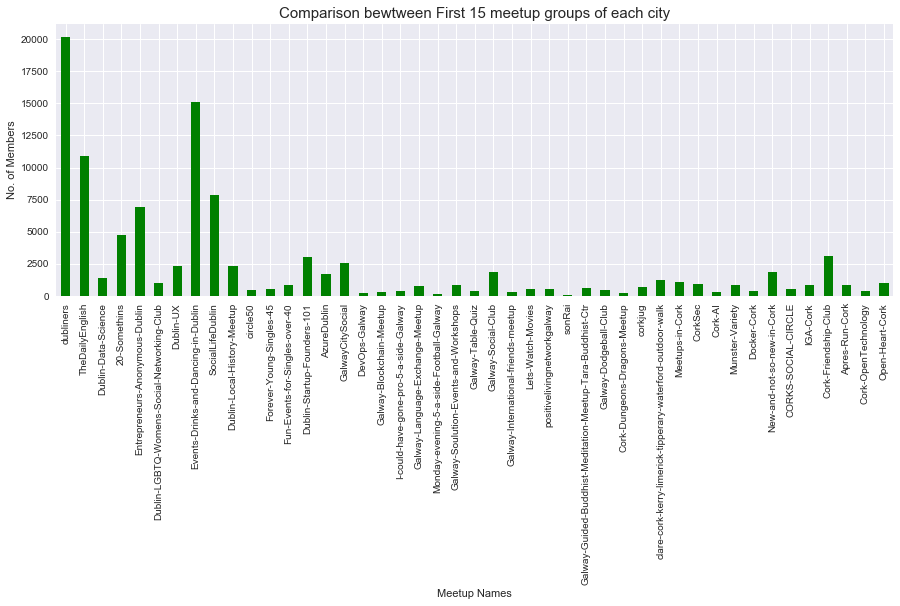

In [15]:
# The below data frame generates some slices on the first 15 meetup groups of each city
aggregate_comparison = pd.concat([processed_df.iloc[0:15], processed_df.iloc[50:65], processed_df.iloc[100:115]])

# A bar graph can be used to see the number of members in each Meetup groups from the above aggregate_comparison dataframe
p=aggregate_comparison['Members'].plot.bar(figsize=(15,5),color="green")

p.set_xlabel("Meetup Names")
p.set_ylabel("No. of Members")
p.set_title("Comparison bewtween First 15 meetup groups of each city", fontsize=15)


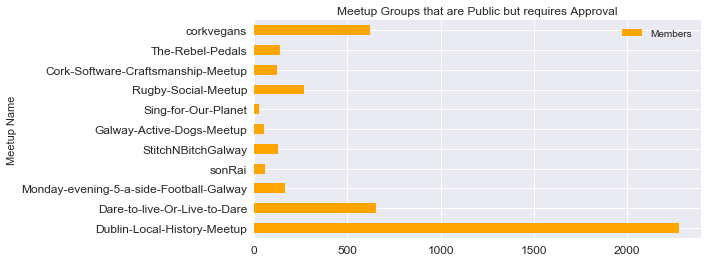

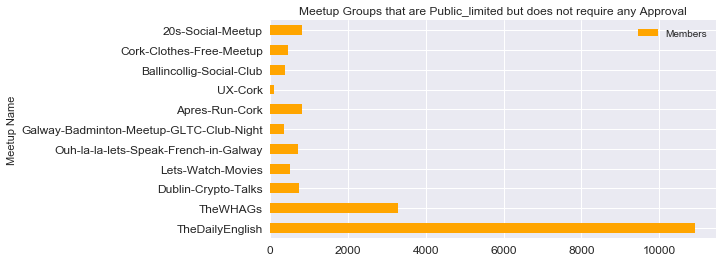

In [16]:
# Plotting the dataframe visjoin_1 which shows the Public and Approval required groups
visjoin_1.plot(figsize=(8,4),kind='barh',title='Meetup Groups that are Public but requires Approval',color='orange', fontsize=12)

# Plotting the dataframe visjoin_2 which shows the Public_limited and Open groups
visjoin_2.plot(figsize=(8,4),kind='barh',title='Meetup Groups that are Public_limited but does not require any Approval',fontsize=12,color='orange')

<font color=Red><b>Observation:</font>

* **The 'Dublin-Local-History-Meetup' group is biggest public group however, it requires an approval from the organizer if you need to join it.**

* **The 'The Daily English'  group is the biggest private group, but it is open to everyone for joining.**

** LINE GRAPH **

A line graph can be used to show a time series data that changes over years. Here in the below visualization the line graph can be used to show creation date of the meetup groups and how many members are now they having. 

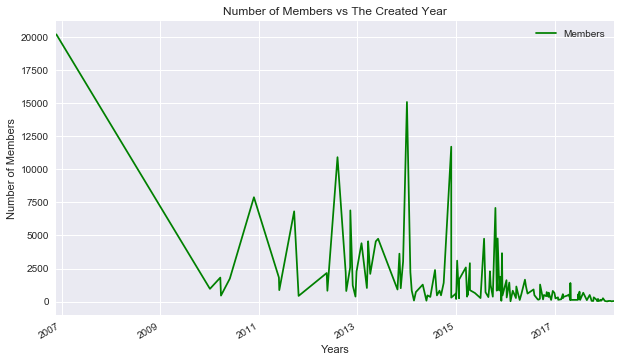

In [17]:
#size of group by which it was formed

time = processed_df.groupby([pd.Grouper(key='Created on')])

createdon=time.mean().round(0)

plt.figure()
createdon.plot(figsize=(10,6), color='green')
plt.title("Number of Members vs The Created Year")
plt.ylabel("Number of Members")
plt.xlabel("Years")
plt.show()

<font color=Red><b>Observation:</font>

* **The line graph shows that most of the meetup groups are formed from 2014 onwards in all the cities. **

* **The first meetup group was formed in the year 2007 and now has the highest members count.**

* **Also, there are some meetup groups formed between 2012-2016 which are also trending and their members count is also increasing**

** PIE PLOT **

A pie plot is used to show a percent comparisons around different categorical value. The below pie chart can be used to show percentage amount of meetup groups based on their members size. Here I used the new derived column for visualization.

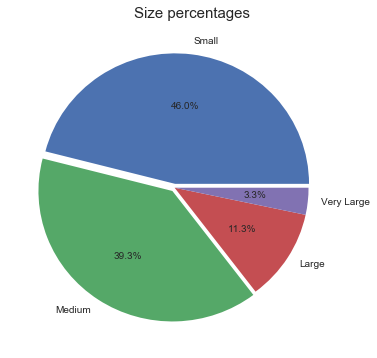

In [18]:
#To show the percentage of Size of the groups
fig, ax = plt.subplots(figsize=(6,6))
fig.subplots_adjust(hspace=50)
size_counts = processed_df["Size"].value_counts()
ax.pie(processed_df['Size'].value_counts(),labels=size_counts.index,autopct="%.1f%%", explode=(0.03,0.03,0,0))
ax.text(-0.3,1.3,'Size percentages',fontsize=15)


<font color=Red><b> Observation:</font>

* **From the pie chart it can be observed that the Small Size groups ar more with 46.7% of total. **


* **Very Large size groups are very less i.e. 3.3%.**

<h3>Using Pandas graphing</h3>

** CROSSTABS **

Pandas Crosstabs are used in showing simple cross-tabulations between two or more factors available in dataframes. 

* In first visualization, we can see how size of groups differ in each cities.


* In second visualization, we can see whether the categories are present in the cties or not.

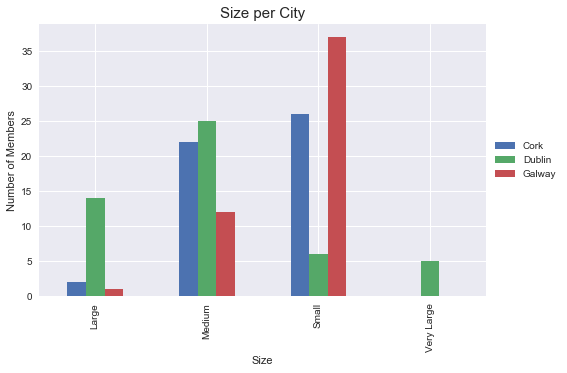

In [19]:
# Using crosstab on Size and City fields
size_df = pd.crosstab(processed_df.Size, processed_df.City)

p = size_df.plot.bar(figsize=(8, 5), width=0.5)
p.set_xlabel("Size")
p.set_ylabel("Number of Members")
p.set_title("Size per City", fontsize=15)
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

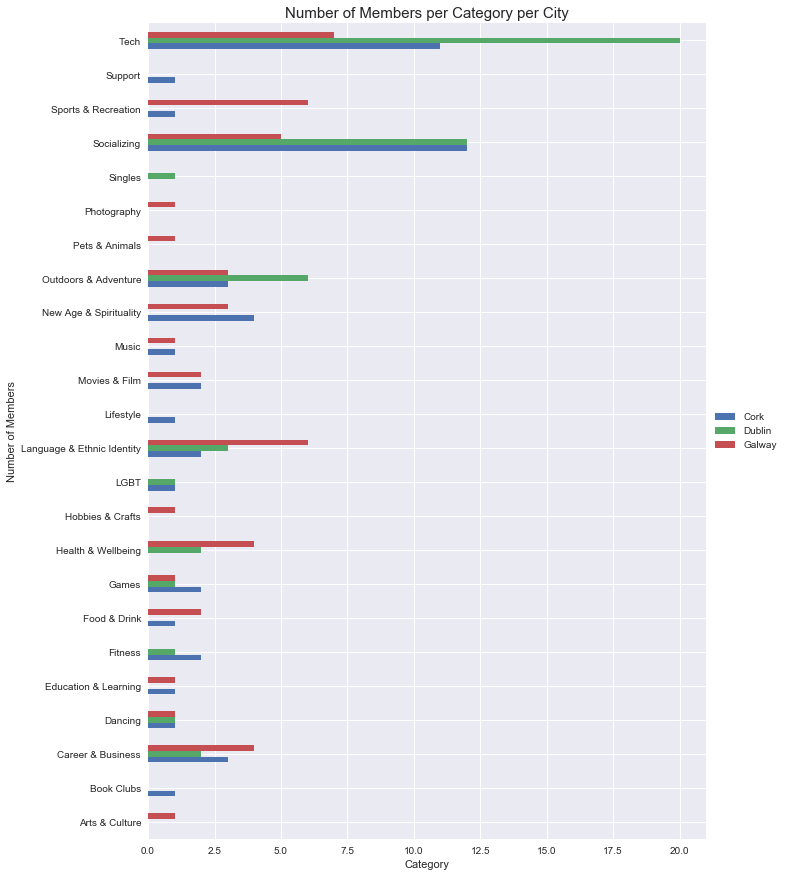

In [20]:
# using crosstab on Category and City fields
categories_df = pd.crosstab(processed_df.Category, processed_df.City)

p = categories_df.plot.barh(figsize=(10, 15), width=0.5)
p.set_xlabel("Category")
p.set_ylabel("Number of Members")
p.set_title("Number of Members per Category per City", fontsize=15)
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

<font color=Red><b>Observation:</font>

* **The first visualization shows that Dublin has more 'Large' or 'Very Large' size groups, whereas Galway and Cork are having more 'Small' groups.**


* **The second visualization shows there are some groups thar are available only in Dublin or Galway or Cork. Thus, it helps in understanding the avaibility of particular group in particular city.**

<h3>Using Seaborn graphs</h3><br>

<font color=Red><b>Use of Seaborn packages is good if you have more categorical values.</font>


** COUNTPLOTS **

Countplots are used to show the counts of particular features available in the categorical bin

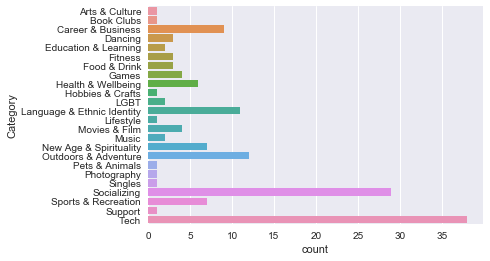

In [21]:
# It counts the number of categories in our main processed dataframe

sns.countplot(y='Category', data=processed_df.sort_values('Category'))

** FACTOR PLOT **

A factor plot comines the categorical plots and the class and gives the output in the form of facetgrid. Generally in order to visualize a categorical data comparison these Factor plots are preferred.

* **Kind = Bar:** A simple bar graph is used to plot factor graph.

* **Kind = Swarm: ** In order to show the distribution of the data, swarm plots are preferred



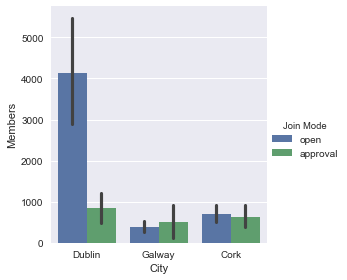

In [22]:
# It shows the features like City,Members on x and y axis with Join Mode features used as hue.
sns.factorplot(x="City", y="Members", hue="Join Mode", data=processed_df, kind="bar");


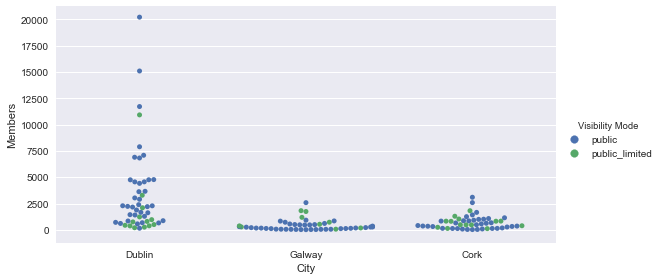

In [23]:
# Using Swarm plots for showing the distribution in visibility modes.
fig=plt.figure(figsize=(10, 6))
sns.factorplot(x="City", y="Members", hue="Visibility Mode", data=processed_df, kind="swarm", aspect=2);


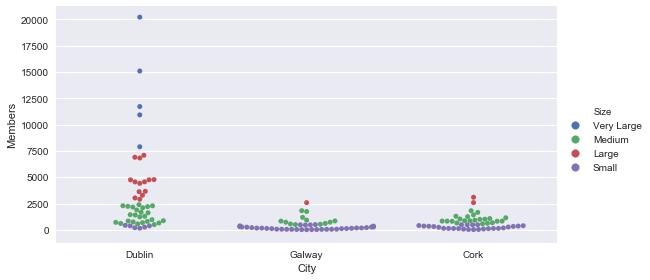

In [25]:
# Using Swarm plots for showing the distribution in the group size. The group size distribution helps in getting a nice observation
# of how the group size is distributed among different cities.
fig=plt.figure(figsize=(10, 6))
sns.factorplot(x="City", y="Members", hue="Size", data=processed_df, kind="swarm", aspect=2);


 **BOX PLOT**
 
 Box plot also shows the distribution on the quantitative data that can be used to compare categorical values.

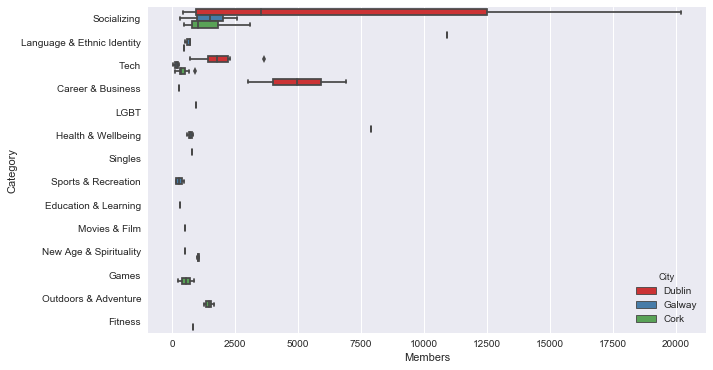

In [26]:
# I hve created a sliced dataframe of main processed dataframe to show the use of boxplot and pointplot
newdf3=pd.concat([processed_df.iloc[0:20], processed_df.iloc[50:70], processed_df.iloc[100:120]])

fig=plt.figure(figsize=(10, 6))

sns.boxplot(x="Members", y="Category", hue="City", data=newdf3,palette="Set1");

** POINT PLOT **

A point plot can be used to show levels change between two categorical elements. The interactions are judged by setting a hue element by differences in the slopes.

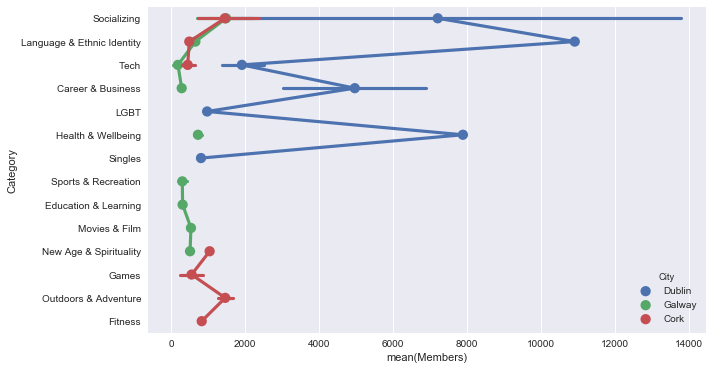

In [27]:
#point plot
fig=plt.figure(figsize=(10, 6))

sns.pointplot(x="Members", y="Category", hue="City", data=newdf3);


<h2>Final Manipulation, Exploration and Visualisation</h2>

The Final Comparison can be done between two or more features.

* Comparing the Visibility Modes and Join Modes

* Finding the top four groups based on the number of members.

* It can be by calculating the average values of members depending on categories or cities

** In order to perform this comparisons I have creates some new dataframes from the existing dataframe by performing different operations on it.**


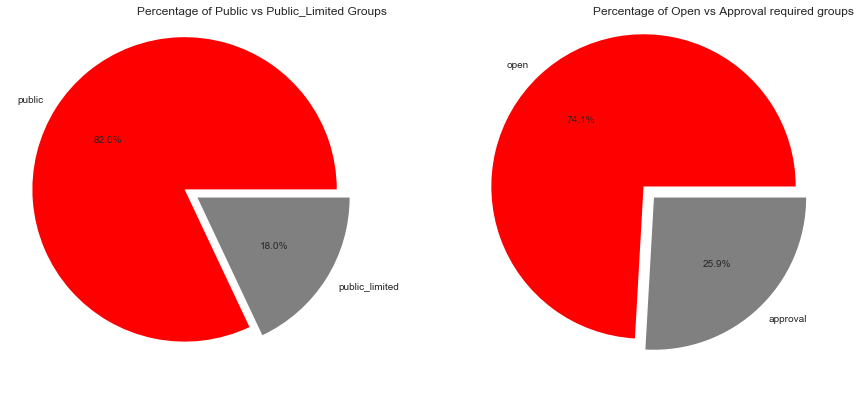

In [28]:
#Comparison between two categorical features Visibility Mode and Join Mode got from visjoin_3 dataframe
visibility_counts = visjoin_3['Visibility Mode'].value_counts()
join_counts = visjoin_3['Join Mode'].value_counts()



fig, ax = plt.subplots(1, 2, figsize=(15,7))
fig.subplots_adjust(hspace=50)

ax[0].pie(visjoin_3['Visibility Mode'].value_counts(),labels=visibility_counts.index,autopct="%.1f%%",colors=['red','grey'],explode=(0.1,0))
ax[0].text(-0.4,1.2,"Percentage of Public vs Public_Limited Groups",fontsize=12)
ax[1].pie(visjoin_3['Join Mode'].value_counts(),labels=join_counts.index, autopct="%.1f%%",colors=['red','grey'],explode=(0.1,0))
ax[1].text(-0.4,1.2,"Percentage of Open vs Approval required groups", fontsize=12)


<font color=Red><b>Analysis:</font>

It can be observed that there are more Public meetup groups than the private groups and they are open to join anytime as compared to the requirement of approval. 

**So, the analysis says that if you form any new meetup group you should keep the Visibility and Join Modes as Public and Open until and unless any specific need of private or approval mode is required.**

In [29]:
# Creating a new dataframe which sorts the values according to cities and members and the final is grouped by cities, to get 
# top 4 meetup groups of that cities.

top_meetups=processed_df.sort_values(['City','Members'], ascending=[False,False])
top4_bycity=top_meetups.groupby('City').head(4)
top4_bycity

,City,Category,Created on,Visibility Mode,Join Mode,Members,Size
Meetup Name,,,,,,,
GalwayCitySocial,Galway,Socializing,2012-11-07 14:59:58,public,open,2582,Large
Galway-Social-Club,Galway,Socializing,2011-05-29 17:51:01,public_limited,approval,1819,Medium
OutdoorPursuits,Galway,Outdoors & Adventure,2010-05-31 01:01:56,public_limited,approval,1739,Medium
Singles-Mingle-Ireland,Galway,Socializing,2016-06-01 17:50:58,public_limited,approval,1186,Medium
dubliners,Dublin,Socializing,2006-11-22 10:48:51,public,open,20203,Very Large
Events-Drinks-and-Dancing-in-Dublin,Dublin,Socializing,2014-01-02 08:29:14,public,open,15088,Very Large
Speak-English-Dublin,Dublin,Language & Ethnic Identity,2014-11-26 13:56:56,public,open,11710,Very Large
TheDailyEnglish,Dublin,Language & Ethnic Identity,2012-08-05 19:50:10,public_limited,open,10918,Very Large
Cork-Friendship-Club,Cork,Socializing,2015-01-09 09:01:01,public,open,3095,Large


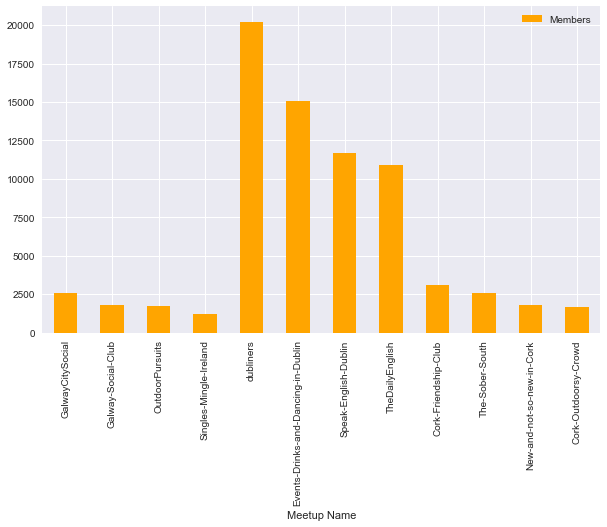

In [30]:
# Visualization of top 4 meetup groups based on their Members count
top4_bycity.plot(figsize=(10,6),kind='bar',color='orange')

<font color=Red><b>Analysis:</font>

** Dublin has the top 4 groups with respect to number of members and can be a good place to share your knowledge by presenting at the meetup.**

In [31]:
# A numerical data i.e the number of Members can be used to see which meetup category and city is most preferred, by 
# considering average members count.

# To calculate the average number of members in each city.
avg_members_city = processed_df.groupby('City').Members.sum()/processed_df.groupby('City').Members.count()
print('Descriptive analysis for each cities with average number of members:')
avg_members_city

Descriptive analysis for each cities with average number of members:


City
Cork       677.06
Dublin    3336.30
Galway     409.28
Name: Members, dtype: float64

In [32]:
# To calculate the average number of members in each category.
avg_members_cat = processed_df.groupby('Category').Members.sum()/processed_df.groupby('Category').Members.count()
print('Descriptive analysis for each category with average number of members:')
avg_members_cat[0:5]

Descriptive analysis for each category with average number of members:


Category
Arts & Culture           175.000000
Book Clubs                34.000000
Career & Business       1305.666667
Dancing                 1484.000000
Education & Learning     307.000000
Name: Members, dtype: float64

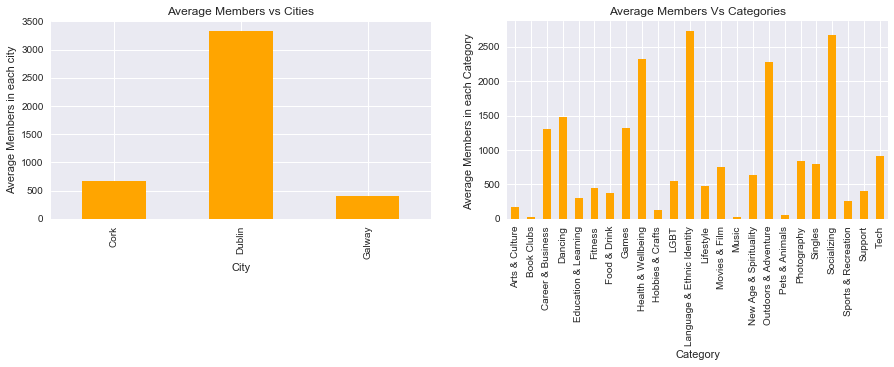

In [33]:
#Average Members Count

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(221)
ax1.set_xlabel('City')
ax1.set_ylabel('Average Members in each city')
ax1.set_title("Average Members vs Cities")
avg_members_city.plot(kind='bar',color='Orange')

ax2 = fig.add_subplot(222)
ax2.set_xlabel('Category')
ax2.set_ylabel('Average Members in each Category ')
ax2.set_title("Average Members Vs Categories")
avg_members_cat.plot(kind='bar',color='Orange')

<font color=Red><b>Analysis:</font>
* ** The above first analysis gives us the average number of members in each city. It can be seen that Dublin has maximum amount of people joining the meetups with Galway having minimum. **


* ** The above second analysis gives us the average number of members in each category. It can be seen that Language and Ethnic Category has maximum amount of people preference, with Socializing and Health & Wellbeing also preferred, whereas Music and Book Clubs category are having minimum preferences of joining. ** 

* ** It can be seen from the above results that, Dublin City has lot number of members in a meetup groups and also the number of meetup groups available are more. But, it can be observed that from 2017 onwards the groups formed in Galway and Cork are more than that in Dublin. **



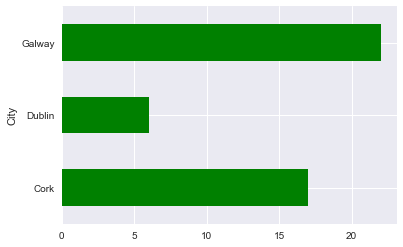

In [34]:
# To count new groups recently created in each city
latestcreated=processed_df[(processed_df['Created on']>'2017')]

latestcreatedplot=latestcreated.groupby('City').Members.count()
latestcreatedplot.plot(kind="barh",color='green')

<font color=Red><b>Analysis:</font>


**This can lead to an analysis that, the public in Galway and Cork is becoming more socialize and enthusiatic in creating meetups across their cities. **

<h3> Tentative Conclusion and Further Analysis </h3>

 ** A temporary conclusion can be that, irrespective of Category of a meetup group or its Visibility/Join Mode, DUBLIN city leads in the Meetup Analysis compared to GALWAY and CORK city.**


<br>
<font color=Green><i><b> A further analysis can include involving more cities from different countries. Also from our processed data, we have a feature named 'Status' which states whether the groups are still 'Active' or 'Lapsed'. Unfortunately, in my data all the 'Active' status groups were present. But if the scope is broadened by including cities from other countries holding meetup groups, then more analysis can be done using this feature.</font>